# Python Beginners Workshop - Day 3

# Sesson 2: Seaborn

## Learning Goals:
- Introduction to Seaborn
- Exploring different types of plots provided by Seaborn

## Seaborn

Seaborn is a Python data visualization library based on matplotlib. Seaborn focuses on exploring the statistical properties of the data, and relationships between variables:

In short, it helps:
- examining relationships between multiple variables
- support for using categorical variables to show observations or aggregate statistics
- visualizing univariate or bivariate distributions and for comparing them between subsets of data
- Automatic estimation and plotting of linear regression models for different kinds dependent variables
- High-level abstractions for structuring multi-plot grids that let you easily build complex visualizations
- Concise control over matplotlib figure styling with several built-in themes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

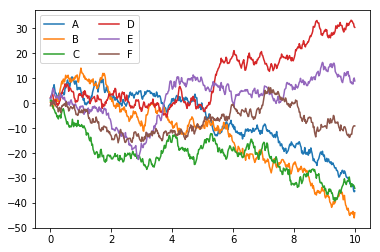

In [4]:
# Plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left');

In [5]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

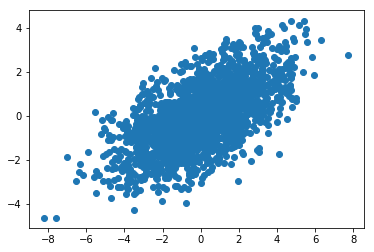

In [6]:
plt.scatter(data.x, data.y);

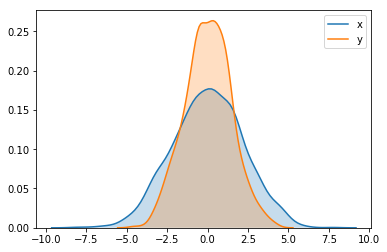

In [7]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

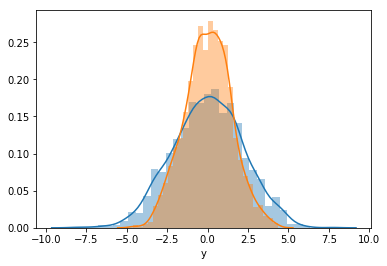

In [8]:
sns.distplot(data['x'])
sns.distplot(data['y']);

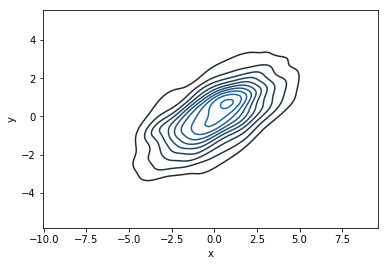

In [9]:
sns.kdeplot(data['x'], data['y'])

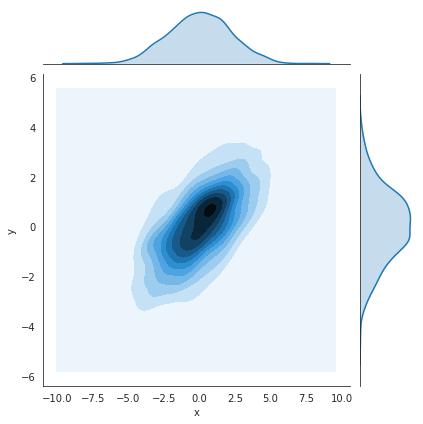

In [10]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

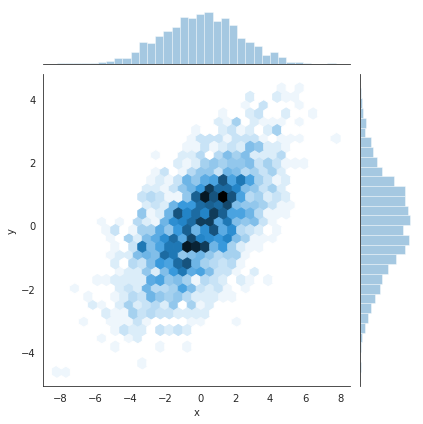

In [11]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='hex')

## Pair plot

When you generalize joint plots to datasets of larger dimensions, you end up with pair plots. This is very useful for exploring correlations between multidimensional data, when you'd like to plot all pairs of values against each other.

We'll demo this with the well-known Iris dataset, which lists measurements of petals and sepals of three iris species:

In [12]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


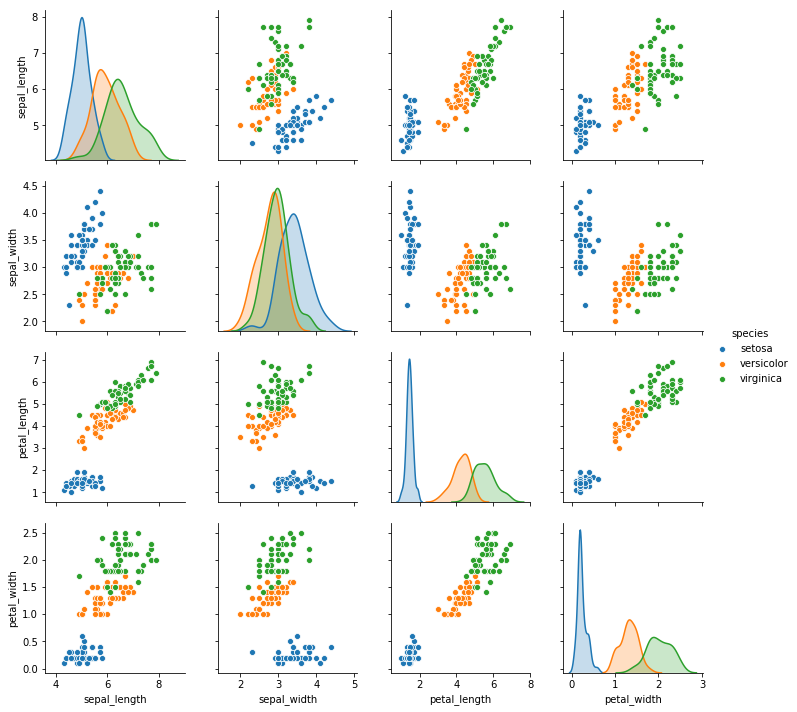

In [13]:
sns.pairplot(iris, hue='species', height=2.5);

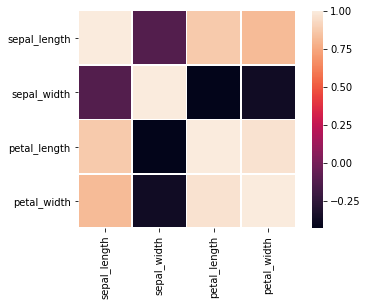

In [14]:
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(iris.corr(), square=True, linewidths=.5);

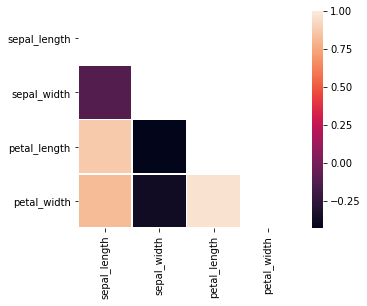

In [15]:
# Generate a mask for the upper triangle
mask = np.zeros_like(iris.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(iris.corr(), mask=mask, square=True, linewidths=.5);

In [16]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


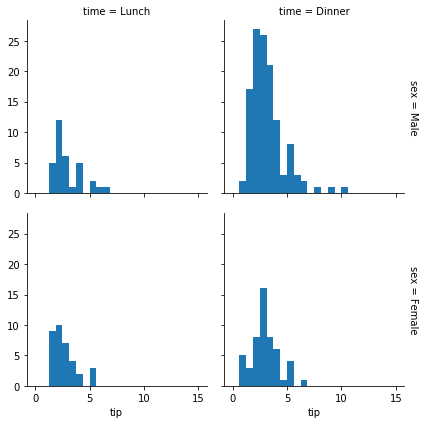

In [17]:
grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip", bins=np.linspace(0, 15, 25));

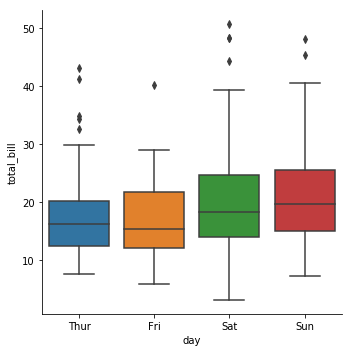

In [18]:
sns.catplot("day", "total_bill", data=tips, kind="box");

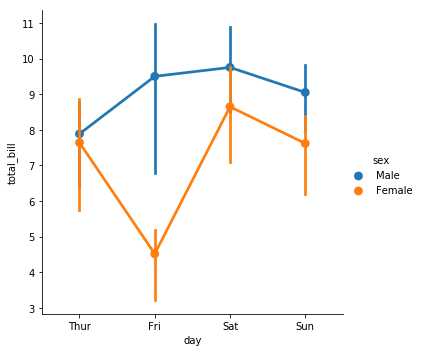

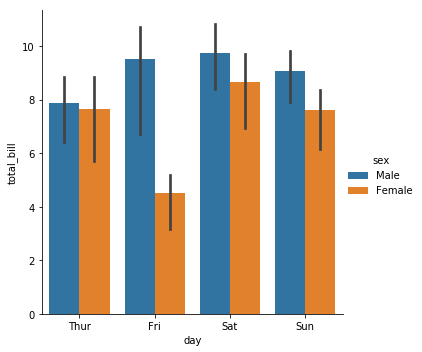

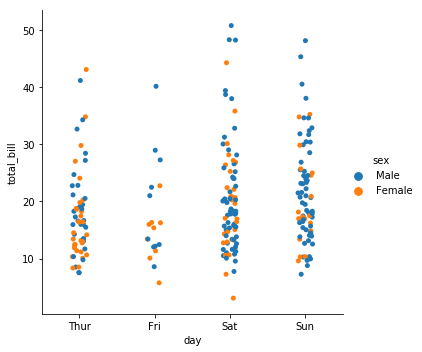

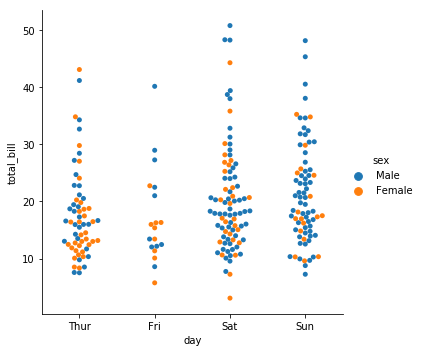

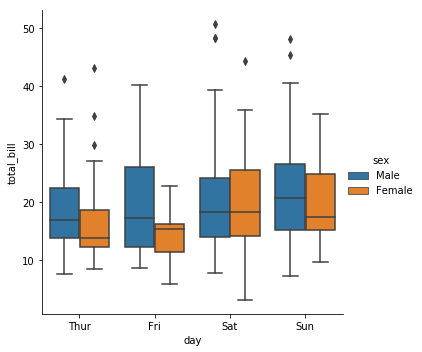

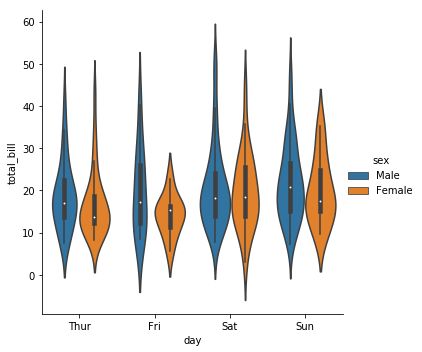

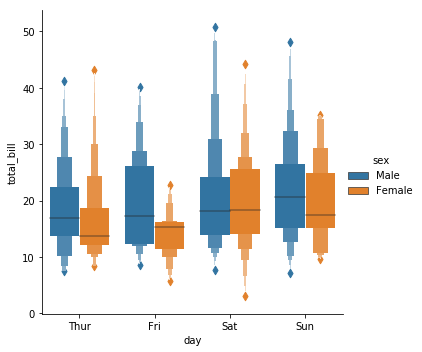

In [28]:
kinds = ["point", "bar", "strip", "swarm", "box", "violin", "boxen"]
for kind in kinds:
    g = sns.catplot(x="day", y="total_bill", hue="sex", data=tips, kind=kind, ci=68, estimator=np.std)

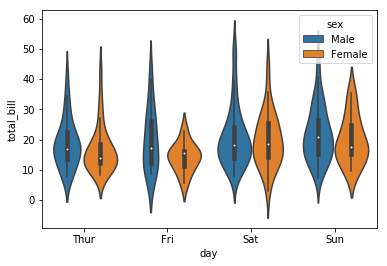

In [20]:
sns.violinplot("day", "total_bill", "sex", data=tips);

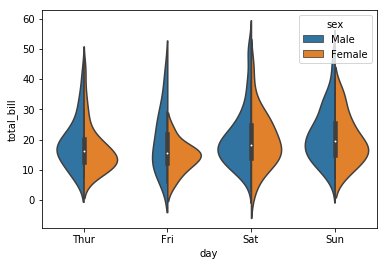

In [46]:
sns.violinplot("day", "total_bill", "sex", data=tips, split=True);

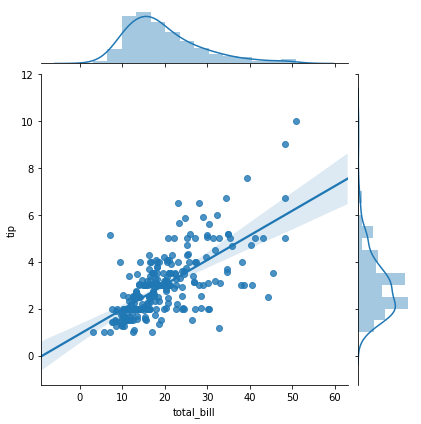

In [102]:
sns.jointplot("total_bill", "tip", data=tips, kind='reg');

alright. Now let's load the titanic data, and see some interesting results

In [86]:
titanic = sns.load_dataset("titanic")

In [94]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


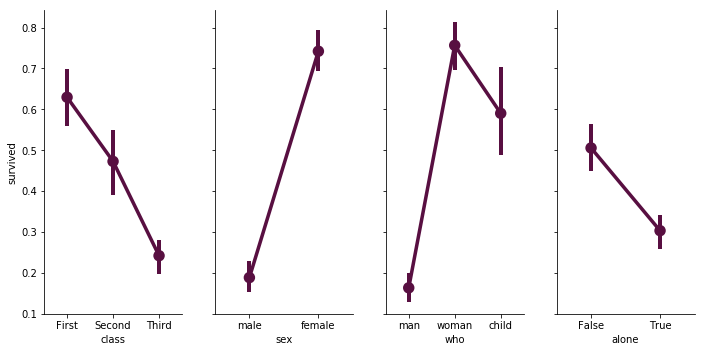

In [99]:
g = sns.PairGrid(titanic, y_vars="survived",
                 x_vars=["class", "sex", "who", "alone"],
                 height=5, aspect=.5)

g.map(sns.pointplot, scale=1.3, errwidth=4, color="xkcd:plum");

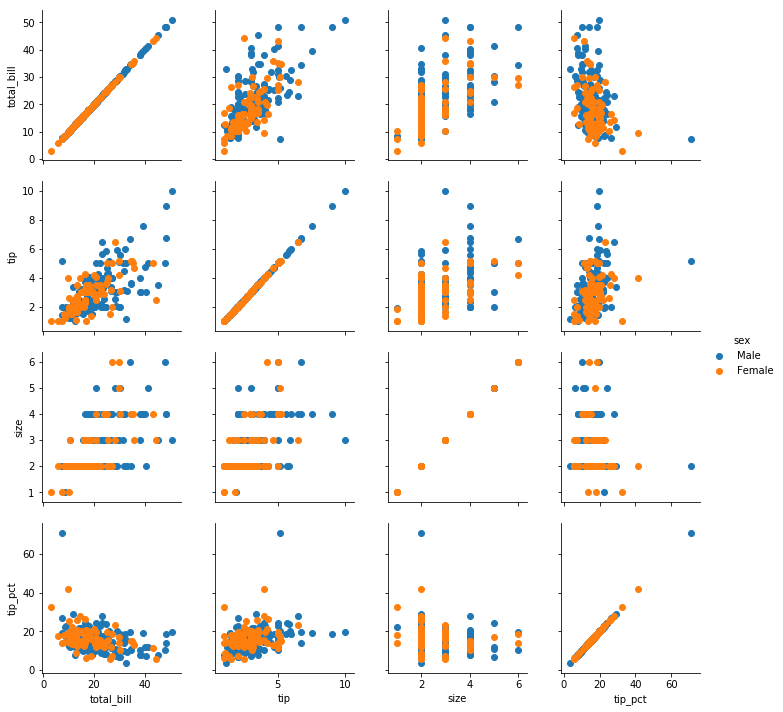

In [52]:
g = sns.PairGrid(tips, hue='sex')
g.map(plt.scatter)
g.add_legend();